![](https://blog.blogness.net/wp-content/uploads/2015/08/mob.jpg)

<h1><center> US Consumer Finance Complaints </center></h1>

# Introduction

Each week the American **Consumer Financial Protection Bureau (CFPB)** sends thousands of consumers’ complaints about financial products and services to companies for response. Those complaints are published here [CFPB](https://www.consumerfinance.gov/complaint/) after the company responds or after 15 days. By adding their voice, consumers help improve the financial marketplace get their voices heard.

Fields Include:

* **Date received**: The date the CFPB received the complaint. For example, “05/25/2013.”
* **Product**: The type of product the consumer identified in the complaint. For example, “Checking or savings account” or “Student loan.”
* **Sub-product**: The type of sub-product the consumer identified in the complaint. For example, “Checking account” or “Private student loan.”
* **Issue**: The issue the consumer identified in the complaint. For example, “Managing an account” or “Struggling to repay your loan.”
* **Sub-issue**: The sub-issue the consumer identified in the complaint. For example, “Deposits and withdrawals” or “Problem lowering your monthly payments.”
* **Consumer complaint narrative**: Consumer complaint narrative is the consumer-submitted description of “what happened” from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer.
* **Company public response**: The company’s optional, public-facing response to a consumer’s complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, “Company believes complaint is the result of an isolated error.”
* **Company**: The complaint is about this company. For example, “ABC Bank.”
* **State**: The state of the mailing address provided by the consumer.
* **ZIP Code**: The mailing ZIP code provided by the consumer. 
* **Consumer consent provided?**: Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents, and consumers can opt-out at any time.
* **Submitted via**: How the complaint was submitted to the CFPB. For example, “Web” or “Phone.”
* **Date sent to company**: The date the CFPB sent the complaint to the company.
* **Company response to consumer**: This is how the company responded. For example, “Closed with explanation.”
* **Timely response?**: Whether the company gave a timely response. For example, “Yes” or “No.”
* **Consumer disputed?**: Whether the consumer disputed the company’s response.
* **Complaint ID**: The unique identification number for a complaint.

Credit: [CFPB](https://www.consumerfinance.gov/complaint/data-use/#reports)

# Context

## Business Problem

A thorough analysis of the complaints being received by a company, places that company at a better position when it comes to monitoring and/or characterizing the overall opinion of customers towards their products or services. Furthermore, such an analysis brings potential inefficiencies to light, which only the customers are aware of.

## Objective

The objective of this analysis is:
* to study consumer complaints as pertaining to the financial products of various companies.
* identify the most prevalent issues
* the top companies receiving most of the complaints
* the American state receiving the largest number of complaints
* the period (month and weekday) in which most complaints were received
* the most common response received from companies
* relationship between whether consumers disputed and timely response

Let's do this.

## Business Benefit

![](https://technofaq.org/wp-content/uploads/2018/02/customer_loyalty.gif)

A **better understanding of the major issues** among customers allows the company to **tackle those issues** and **increase retention and loyalty** among the customers by providing easy and efficient services and/or products.

# Imports and Cleaning Data

## Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

import plotly
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# Options for pandas
#pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

init_notebook_mode(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

import warnings  
warnings.filterwarnings('ignore')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [7]:
df = pd.read_csv('../input/us-consumer-finance-complaints/consumer_complaints.csv',low_memory=False)
df_copy = df.copy() # Save a copy for later

Have a quick look at the data:

In [8]:
df.head(10)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098
6,08/30/2013,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Wells Fargo & Company,AZ,85730,NaN,NaN,Postal mail,09/05/2013,Closed with explanation,Yes,No,511062
7,08/30/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,IL,60660,NaN,NaN,Referral,09/04/2013,Closed with explanation,Yes,No,511116
8,08/30/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,GA,30016,NaN,NaN,Referral,09/04/2013,Closed with explanation,Yes,No,511091
9,09/17/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SunTrust Banks, Inc.",CA,94551,NaN,NaN,Web,09/18/2013,Closed with explanation,Yes,Yes,530602


To make sure that all the records are imported, we have a look at 5 random observations:

In [9]:
df.sample(5,random_state=89)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
159512,11/16/2014,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,ERC,NY,11758,NaN,NaN,Web,11/16/2014,Closed with non-monetary relief,Yes,Yes,1118766
552555,03/26/2015,Bank account or service,Checking account,"Account opening, closing, or management",NaN,I had XXXX accounts with XXXX that I signed up...,Company chooses not to provide a public response,BB&T Financial,TX,752XX,NaN,Consent provided,Web,03/26/2015,Closed with explanation,Yes,No,1302589
111751,07/29/2014,Debt collection,Auto,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Ford Motor Credit Company,CA,92126,NaN,NaN,Web,07/31/2014,Closed with explanation,Yes,No,958004
346266,12/28/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Ocwen,MS,39562,Servicemember,NaN,Web,09/25/2013,Closed with explanation,Yes,No,218817
190719,03/06/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"Portfolio Recovery Associates, Inc.",TX,76031,NaN,NaN,Referral,03/12/2015,Closed with non-monetary relief,Yes,No,1271010


Finally we look at the last 5 observations

In [10]:
df.tail()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963
555956,08/14/2014,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"CCS Financial Services, Inc.",NaN,NaN,NaN,NaN,Phone,08/18/2014,Closed with explanation,Yes,No,984116


Since, I am pedantic, the small letter column headings don't quite work with me and thus I make them upper case...haha (completely unnecessary step this):

In [11]:
df.columns = df.columns.str.upper()
df.head(2)

,DATE_RECEIVED,PRODUCT,SUB_PRODUCT,ISSUE,SUB_ISSUE,CONSUMER_COMPLAINT_NARRATIVE,COMPANY_PUBLIC_RESPONSE,COMPANY,STATE,ZIPCODE,TAGS,CONSUMER_CONSENT_PROVIDED,SUBMITTED_VIA,DATE_SENT_TO_COMPANY,COMPANY_RESPONSE_TO_CONSUMER,TIMELY_RESPONSE,CONSUMER_DISPUTED?,COMPLAINT_ID
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


### Missing values

In [12]:
df.isnull().mean().round(4)*100

DATE_RECEIVED                    0.00
PRODUCT                          0.00
SUB_PRODUCT                     28.48
ISSUE                            0.00
SUB_ISSUE                       61.76
CONSUMER_COMPLAINT_NARRATIVE    87.98
COMPANY_PUBLIC_RESPONSE         84.69
COMPANY                          0.00
STATE                            0.88
ZIPCODE                          0.81
TAGS                            85.98
CONSUMER_CONSENT_PROVIDED       77.79
SUBMITTED_VIA                    0.00
DATE_SENT_TO_COMPANY             0.00
COMPANY_RESPONSE_TO_CONSUMER     0.00
TIMELY_RESPONSE                  0.00
CONSUMER_DISPUTED?               0.00
COMPLAINT_ID                     0.00
dtype: float64

In [13]:
# code chunk that I saw in Gabriel Preda kernel
# Reference write kernel here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    
    #print("\n Total of Sales % of Total: ", round((df[df['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    
    return 
missing_values(df)

Total columns at least one Values: 
                               Total    Percent
CONSUMER_COMPLAINT_NARRATIVE  489151  87.983603
TAGS                          477998  85.977513
COMPANY_PUBLIC_RESPONSE       470833  84.688744
CONSUMER_CONSENT_PROVIDED     432499  77.793606
SUB_ISSUE                     343335  61.755675
SUB_PRODUCT                   158322  28.477382
STATE                           4887   0.879025
ZIPCODE                         4505   0.810314


So we see there are about five fields with a high number of missing values. Noting that the majority of fields are populated.

Next we ask, **what the data types of the various features are:**

In [14]:
# Function that takes the data type of a single column and converts it into easier to understand language
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))
print_categories(df)

DATE_RECEIVED :  Categorical
PRODUCT :  Categorical
SUB_PRODUCT :  Categorical
ISSUE :  Categorical
SUB_ISSUE :  Categorical
CONSUMER_COMPLAINT_NARRATIVE :  Categorical
COMPANY_PUBLIC_RESPONSE :  Categorical
COMPANY :  Categorical
STATE :  Categorical
ZIPCODE :  Categorical
TAGS :  Categorical
CONSUMER_CONSENT_PROVIDED :  Categorical
SUBMITTED_VIA :  Categorical
DATE_SENT_TO_COMPANY :  Categorical
COMPANY_RESPONSE_TO_CONSUMER :  Categorical
TIMELY_RESPONSE :  Categorical
CONSUMER_DISPUTED? :  Categorical
COMPLAINT_ID :  Numerical


We find that, **most of the features are categorical**.

## Performance issues

Object (ussually meaning a string is being stored) columns in a pandas dataframe can take up quite a lot of space. To see how much space the current object columns are taking up, we use:

In [15]:
df.memory_usage(deep=True).sum()
#df.info(memory_usage=True)

644569001

As we expected, it's pretty significant...with the **ISSUE** attribute taking up the most space. To reduce the memory being used up, we store the strings in the dataframe as integers :)

In [16]:
df['ISSUE'] = df.ISSUE.astype('category')
df['DATE_RECEIVED'] = df.DATE_RECEIVED.astype('category')
df['PRODUCT'] = df.PRODUCT.astype('category')
df['SUB_ISSUE'] = df.SUB_ISSUE.astype('category')
df['CONSUMER_COMPLAINT_NARRATIVE'] = df.CONSUMER_COMPLAINT_NARRATIVE.astype('category')
df['COMPANY_PUBLIC_RESPONSE'] = df.COMPANY_PUBLIC_RESPONSE.astype('category')
df['COMPANY'] = df.COMPANY.astype('category')
df['CONSUMER_CONSENT_PROVIDED'] = df.CONSUMER_CONSENT_PROVIDED.astype('category')
df['COMPANY_RESPONSE_TO_CONSUMER'] = df.COMPANY_RESPONSE_TO_CONSUMER.astype('category')
df['SUBMITTED_VIA'] = df.SUBMITTED_VIA.astype('category')

In [17]:
df.memory_usage(deep=True).sum()
#df.info(memory_usage=True)

315682910

Notice, the overall reduction in the amount of memory being used up (~ halfed) :). I note however, that you should ideally use **astype('category')** on obejct columns that only have a few different values and not a ton of different values (case here).

A really cool package I recently came accross is the **pandas_profiling**, which profiles tabular data in a pandas dataframe. This literally means it gives us all the stuff we've done above to understand the structure of our data and much more in one line of code. For a discussion on it see [Towards Data Science](https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625).

In [18]:
#Witness the magic
pandas_profiling.ProfileReport(df)

Number of variables,18
Number of observations,555957
Total Missing (%),23.8%
Total size in memory,45.2 MiB
Average record size in memory,85.2 B
Numeric,1
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,0


The latter makes the process of getting a quick and dirty understanding of your data much faster :)

# Single Variable Explorations

In this section, we examine one variable at a time, find out what each variable means, look at distribution of values and provide appropriate summary statistics.

## Summary Statistics

In [19]:
#df.set_index(['ISSUE','PRODUCT','SUB_ISSUE','COMPANY','SUBMITTED_VIA'],inplace=True)
df[['ISSUE','DATE_RECEIVED','PRODUCT','SUB_ISSUE','CONSUMER_COMPLAINT_NARRATIVE',
    'COMPANY','COMPANY_PUBLIC_RESPONSE','CONSUMER_CONSENT_PROVIDED','COMPANY_RESPONSE_TO_CONSUMER','SUBMITTED_VIA']].describe().transpose()

,count,unique,top,freq
ISSUE,555957,95,"Loan modification,collection,foreclosure",97191
DATE_RECEIVED,555957,1608,08/27/2015,963
PRODUCT,555957,11,Mortgage,186475
SUB_ISSUE,212622,68,Account status,26798
CONSUMER_COMPLAINT_NARRATIVE,66806,65646,This company continues to report on my credit ...,37
COMPANY,555957,3605,Bank of America,55998
COMPANY_PUBLIC_RESPONSE,85124,10,Company chooses not to provide a public response,52478
CONSUMER_CONSENT_PROVIDED,123458,4,Consent provided,66807
COMPANY_RESPONSE_TO_CONSUMER,555957,8,Closed with explanation,404293
SUBMITTED_VIA,555957,6,Web,361338


We find that...

## Distributions

In this section, we shall gain some intuition into the data by looking at the distributions of key features.

Since we have seen earlier that our data mostly contains categorical features, this implies that this analysis will mostly involve looking at frequencies of the various text.

### What are the top 10 issues and sub issues?

In [20]:
import seaborn as sns; sns.set(style='white')
df['ISSUE'].str.strip("'").value_counts()[0:10].iplot(kind='bar',title='Top 10 issues',fontsize=14,color='#7070FF')

We find that, most complaints received by the **CFPB** are on **Loan modification, collection, and foreclosure**, followed by complaints on **Incorrect information on credit report**.

In [21]:
df['SUB_ISSUE'].str.strip("'").value_counts()[0:10].iplot(kind='bar',
                                                          title='Top 10 Sub Issues',fontsize=14,color='#9370DB')

Most customers complained about their **Account Status** being incorrect, being incorrectly assigned **debt**, and **incorrect information**.

### Which products give rise to the highest number of complaints?

(-0.5, 2999.5, 1999.5, -0.5)

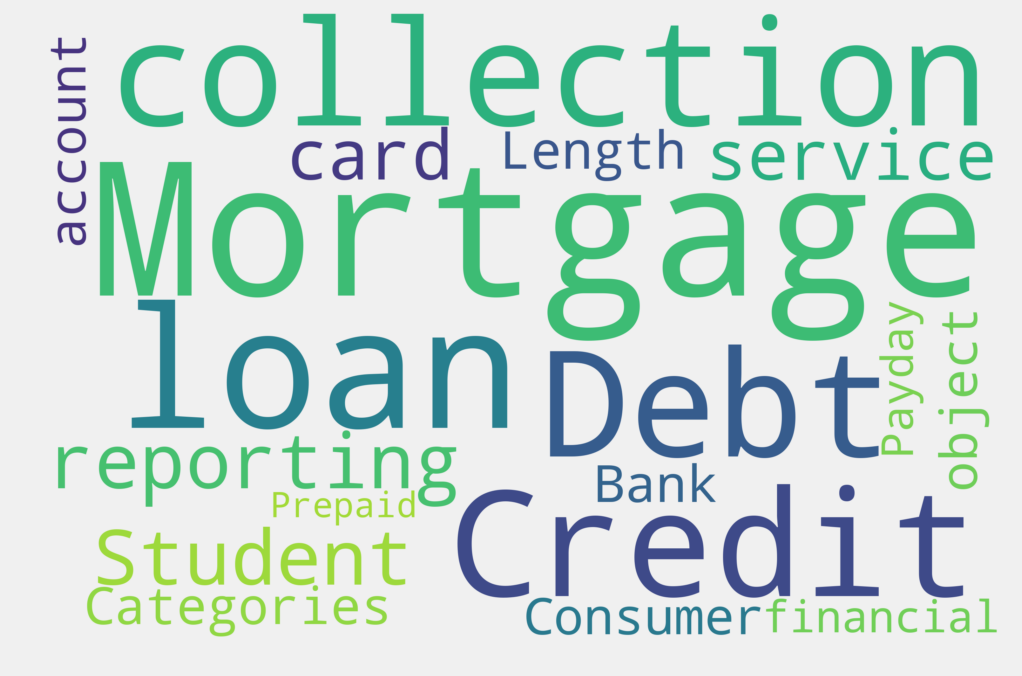

In [22]:
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
text = df['PRODUCT'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#F0F0F0',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (14, 10),
    facecolor = '#F0F0F0',
    edgecolor = '#F0F0F0')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

Most complaints were on **mortgage**, **Credit**, and **Debt**

### Which 10 companies are receiving the most complaints?

In [23]:
comp_dist = df['COMPANY'].str.strip("'").value_counts()[0:10]
fig = {
  "data": [
    {
      "values": comp_dist.values,
      "labels": comp_dist.index
      ,
      "domain": {"column": 0},
      "name": "Bank Complaints",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    ],
  "layout": {
        "title":"Top 10 Banks receiving most complaints",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "BANKS",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

We find that the **Bank of America** received the most complaints, followed by **Wells Fargo & Company**, with **JPMorgan Chase & Co.** coming in third.

### What was the most common medium via which complaints were submitted?

In [24]:
pd.crosstab(df['TIMELY_RESPONSE'],df['SUBMITTED_VIA']).sort_index().iplot(kind='bar',barmode='stack')

It is found that, complaints submitted via **Web** got a faster response.

### Which state received the largest number of complaints?

In [25]:
states = df['STATE'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

It is shown, that the **state of California (CA)**, received the **highest number of complaints**. Would be really interesting to find out the reason for this...

### In which month did most complaints occur and on which day of the week are most complaints received?

In this section, we extract the date features from the **DATE_RECEIVED** field. To achieve this, we import the datetime library:

In [26]:
# library of datetime
from datetime import datetime

In [ ]:
df["DATE"] = pd.to_datetime(df["DATE_RECEIVED"]) # seting the column as pandas datetime
df["YEAR"] = df['DATE'].dt.year # extracting year
df["MONTH"] = df["DATE"].dt.month # extracting month
df["WEEKDAY_NAME"] = df["DATE"].dt.weekday_name # extracting name of the weekday
df["YEAR_MONTH"] = df.YEAR.astype(str).str.cat(df.MONTH.astype(str), sep='-')

In [ ]:
df["YEAR_MONTH"].value_counts().iplot(kind='bar',color='#800000',title='Number of Complaints per Month')

In [ ]:
df["WEEKDAY_NAME"].value_counts().iplot(kind='barh',title='Number of Complaints per Weekday',color='cornflowerblue')

We find that, there has been a **steady increase in the number of complaints** since January 2012, with **most complaints** being **received around the middle of the week**.

### What is the most common response received from companies?

In [ ]:
prod_dist = df.groupby(['COMPANY_RESPONSE_TO_CONSUMER']).size()
trace = go.Pie(labels=prod_dist.index, values=prod_dist,title='Company Response to the Customer')
iplot([trace])

We further find that, most complaints were **Closed with explanation**. With about **7%** being closed with **monetary relief**.

## Consumers that disputed the company response and those that did not?

In [ ]:
test = pd.crosstab(df['TIMELY_RESPONSE'],df['CONSUMER_DISPUTED?'])#.apply(lambda x: x/x.sum() * 100).astype(int)
cm = sns.light_palette("blue", as_cmap=True)

test.style.background_gradient(cmap=cm)

In [ ]:
pd.crosstab(df['TIMELY_RESPONSE'],df['CONSUMER_DISPUTED?']).iplot(kind='bar',title='Timely Response vs Consumer Disputed')

It is found that, most consumers that received a timely response did not dispute the companies response.

# Conclusion

Construction ahead....as I am still learning about text mining. In the next update, I shall dig into the **CONSUMER_COMPLAINT_NARRATIVE** field, which I have not touched yet due to the large amount of text in the field, so stay tuned!

Again, I would like to drive the point home that most businesses want you as a data scientist to show them the money and not the data. Thus, the money in this case, would be improving business efficiency across all the products and services, thus driving down costs arising from handling user complaints and providing great services to the customers accross all products and thus increasing customer loyalty and retention.

Pretty sure, there are loads more business benefits in such an analysis...do let me know if you think of any :)